In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras import layers
from keras.layers import Input, Activation, Dense
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical # Import to_categorical from tensorflow.keras.utils instead of keras.utils.np_utils
from keras.datasets import mnist

In [ ]:
#Download and Save MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
#Scale from 0 to 1
train_x = x_train.astype('float32')/255
test_x = x_test.astype('float32')/255

In [ ]:
#Reshape from 28 x 28 matrix to 784 vector
train_x = np.reshape(train_x, (len(train_x), np.prod(train_x.shape[1:])))
test_x = np.reshape(test_x, (len(test_x), np.prod(test_x.shape[1:]))) # Use test_x instead of train_x for reshaping

In [ ]:
#Target Dimension
TARGET_DIM = 16

In [ ]:
# Define the encoder
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(TARGET_DIM, activation='relu')(input_img)

# Define the decoder
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# Create the autoencoder model
autoencoder = keras.Model(input_img, decoded)

#Compile the model Binary Crossentropy
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

In [ ]:
#Encoder
Inputs = Input(shape=(784,))
h_encode = Dense(256, activation = "relu")(Inputs)
h_encode = Dense(128, activation = "relu")(h_encode)
h_encode = Dense(64, activation = "relu")(h_encode)
h_encode = Dense(32, activation = "relu")(h_encode)

In [ ]:
#Coded
encoded = Dense(TARGET_DIM)(h_encode)

In [ ]:
#Decoder
h_decode = Dense(32, activation = "relu")(encoded)
h_decode = Dense(64, activation = "relu")(h_decode)
h_decode = Dense(128, activation = "relu")(h_decode)
h_decode = Dense(256, activation = "relu")(h_decode)
outputs = Dense(784, activation = "sigmoid")(h_decode)

In [ ]:
#Autoencoder Model
autoencoder = Model(Inputs, outputs)

In [ ]:
#Encoder Model
encoder = Model(Inputs, encoded)

In [ ]:
#Optimizer / Update Rule
adam = Adam(learning_rate = 0.001)

In [ ]:
#Compile the Model Binary Crossentropy
autoencoder.compile(optimizer = adam, loss = "binary_crossentropy")

In [ ]:
#Train and Save Weight
autoencoder.fit(train_x, train_x, epochs=50, batch_size=256, shuffle=True, validation_data=(test_x, test_x))
autoencoder.save_weights("autoencoder_weights.weights.h5") # Changed the filename to include '.weights' before '.h5'
validation_data = (test_x, test_x)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1276 - val_loss: 0.1259
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1271 - val_loss: 0.1259
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1278 - val_loss: 0.1259
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1275 - val_loss: 0.1258
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1274 - val_loss: 0.1259
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.1272 - val_loss: 0.1259
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1272 - val_loss: 0.1258
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1272 - val_loss: 0.1258
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1274 - val_loss: 0.1258
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1273 - val_loss: 0.1257
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.1275 - val_loss: 0.1258
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms

In [ ]:
#Encoded Data
encoded_train = encoder.predict(train_x)
encoded_test = encoder.predict(test_x)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step


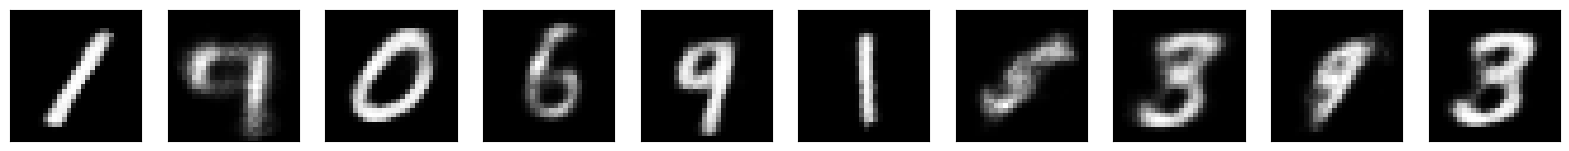

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# Load MNIST dataset
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

# Preprocess the data
train_x = train_x.astype('float32') / 255.
test_x = test_x.astype('float32') / 255.
train_x = train_x.reshape((len(train_x), np.prod(train_x.shape[1:])))
test_x = test_x.reshape((len(test_x), np.prod(test_x.shape[1:])))

#Reconstructed Data
reconstructed = autoencoder.predict(train_x)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    count = 0
    while True :
      # test_y is now defined and can be used here
      if i == test_y[count] :
        #Original
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(test_x[count].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        #Reconstructed
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[count].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        break
      count += 1
plt.show()